In [31]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv("data2.csv")
df

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [6]:
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [7]:
df.tail(1)

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
1360,01/25/2021,2.478,2.363,2.703,2.392,2.298,2.593,2.776,2.615,3.014,3.033,2.9,3.191,2.716


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
Date    1361 non-null object
A1      1361 non-null float64
A2      1361 non-null float64
A3      1361 non-null float64
R1      1361 non-null float64
R2      1361 non-null float64
R3      1361 non-null float64
M1      1361 non-null float64
M2      1361 non-null float64
M3      1361 non-null float64
P1      1361 non-null float64
P2      1361 non-null float64
P3      1361 non-null float64
D1      1361 non-null float64
dtypes: float64(13), object(1)
memory usage: 149.0+ KB


In [9]:
df.describe()

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000


In [30]:
df.shape


(1361, 14)

Text(0.5, 1.0, 'All grade price of oil')

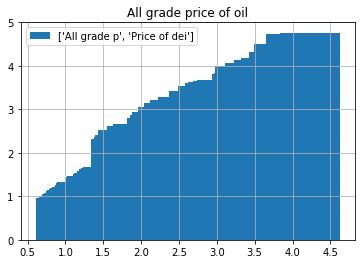

In [55]:
plt.bar(df['M1'],df['D1'] ,label=['All grade p','Price of dei'])
plt.grid()
plt.legend()
plt.title("All grade price of oil")

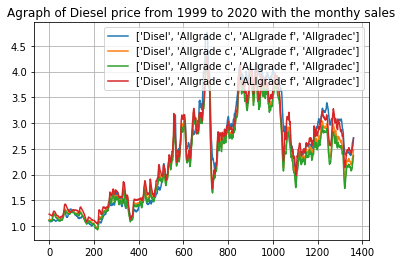

In [49]:
plt.plot(df[['D1','A1','A2','A3']],label=["Disel",'Allgrade c','ALlgrade f','Allgradec'])
plt.title("Agraph of Diesel price from 1999 to 2020 with the monthy sales")
plt.grid()
plt.legend()

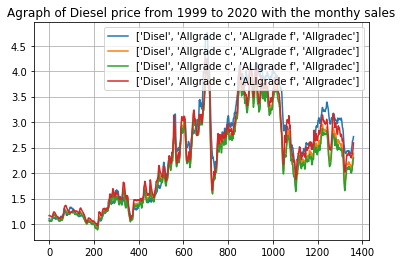

In [51]:
plt.plot(df[['D1','R1','R2','R3']],label=["Disel",'Allgrade c','ALlgrade f','Allgradec'])
plt.title("Agraph of Diesel price from 1999 to 2020 with the monthy sales")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'All grade price of oil')

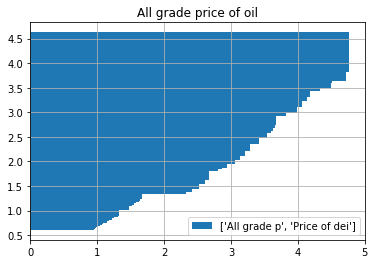

In [56]:
plt.barh(df['M1'],df['D1'] ,label=['All grade p','Price of dei'])
plt.grid()
plt.legend()
plt.title("All grade price of oil")

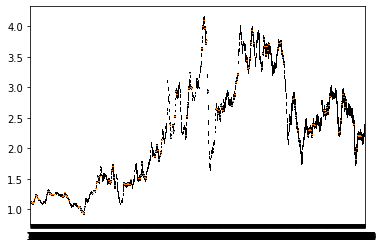

In [67]:
plt.boxplot(df[['A1','A2']])
plt.show()

In [29]:
#to ensure the number remain an integer we import the math model
import math
median_value= math.floor(df.A1.median())

median_value



2

In [16]:
df.A1=  df.A1.fillna(median_value)
df
#It was to ensure the new data was embeded on the original data

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1356,12/28/2020,2.330,2.225,2.535,2.243,2.158,2.423,2.634,2.482,2.858,2.889,2.770,3.031,2.635
1357,01/04/2021,2.336,2.227,2.549,2.249,2.160,2.437,2.639,2.484,2.867,2.895,2.771,3.042,2.640
1358,01/11/2021,2.403,2.298,2.610,2.317,2.232,2.498,2.702,2.550,2.927,2.959,2.839,3.101,2.670
1359,01/18/2021,2.464,2.351,2.688,2.379,2.285,2.579,2.759,2.601,2.995,3.014,2.885,3.166,2.696


In [5]:
#creating a linear Regresssion model
reg1=linear_model.LinearRegression()
reg1.fit(df[['M1','A2','A3']],df.D1)

NameError: name 'linear_model' is not defined

In [24]:
 reg.coef_

array([ 1.46080136,  0.38530239, -0.70976303])

In [25]:
reg.intercept_

-0.23588094806679205

In [28]:
reg.predict([[1.171,1.124,1.163]])

array([1.08234293])

In [1]:
#loading the trained model
from sklearn.externals import joblib

/home/karimi/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
# joblib.dump(reg,'reg_joblib')
joblib.dump(reg,'reg_joblib')

NameError: name 'reg' is not defined